In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train_df.shape

(891, 12)

In [4]:
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
test_df.shape

(418, 11)

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [7]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df.Age=train_df.Age.fillna(train_df.Age.mean())

In [9]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train_df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [11]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250


In [12]:
dummies=pd.get_dummies(train_df.Sex,)

In [13]:
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [15]:
train_df=pd.concat([train_df,dummies],axis=1)

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,female,male
0,1,0,3,male,22.0,7.2500,0,1
1,2,1,1,female,38.0,71.2833,1,0
2,3,1,3,female,26.0,7.9250,1,0
3,4,1,1,female,35.0,53.1000,1,0
4,5,0,3,male,35.0,8.0500,0,1


In [17]:
train_df.drop(['Sex','male'],axis=1,inplace=True)

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Age,Fare,female
0,1,0,3,22.0,7.2500,0
1,2,1,1,38.0,71.2833,1
2,3,1,3,26.0,7.9250,1
3,4,1,1,35.0,53.1000,1
4,5,0,3,35.0,8.0500,0


In [19]:
X=train_df.rename(columns={'female':'Female'})

In [20]:
test_df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [21]:
test_df=pd.concat([test_df,dummies],axis=1)

In [22]:
test_df.head(3)

,PassengerId,Pclass,Sex,Age,Fare,female,male
0,892.0,3.0,male,34.5,7.8292,0,1
1,893.0,3.0,female,47.0,7.0000,1,0
2,894.0,2.0,male,62.0,9.6875,1,0


In [23]:
test_df.drop(['Sex','male'],axis=1,inplace=True)

In [24]:
test_df.rename(columns={'female':'Female'})

,PassengerId,Pclass,Age,Fare,Female
0,892.0,3.0,34.5,7.8292,0
1,893.0,3.0,47.0,7.0000,1
2,894.0,2.0,62.0,9.6875,1
3,895.0,3.0,27.0,8.6625,1
4,896.0,3.0,22.0,12.2875,0
...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,0
887,NaN,NaN,NaN,NaN,1
888,NaN,NaN,NaN,NaN,1
889,NaN,NaN,NaN,NaN,0


In [25]:
test_df.Age=test_df.Age.fillna(test_df.Age.mean())

In [26]:
test_df.head(2)

,PassengerId,Pclass,Age,Fare,female
0,892.0,3.0,34.5,7.8292,0
1,893.0,3.0,47.0,7.0000,1


In [27]:
y=test_df.rename(columns={'female':'Female'})

In [28]:
y.head()

,PassengerId,Pclass,Age,Fare,Female
0,892.0,3.0,34.5,7.8292,0
1,893.0,3.0,47.0,7.0000,1
2,894.0,2.0,62.0,9.6875,1
3,895.0,3.0,27.0,8.6625,1
4,896.0,3.0,22.0,12.2875,0


In [29]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'female'], dtype='object')

In [30]:
input=X.merge(y,on=['PassengerId','Pclass','Age','Fare','Female'],how='outer')

In [31]:
input.head()

,PassengerId,Survived,Pclass,Age,Fare,Female
0,1.0,0.0,3.0,22.0,7.2500,0
1,2.0,1.0,1.0,38.0,71.2833,1
2,3.0,1.0,3.0,26.0,7.9250,1
3,4.0,1.0,1.0,35.0,53.1000,1
4,5.0,0.0,3.0,35.0,8.0500,0


In [32]:
input.shape

(1782, 6)

In [33]:
X1=input.drop('Survived',axis=1)
target=input.Survived

In [34]:
X1.isna().sum()

PassengerId    473
Pclass         473
Age              0
Fare           474
Female           0
dtype: int64

In [35]:
X1.PassengerId=X1.PassengerId.fillna(X1.PassengerId.mean())
X1.Pclass=X1.Pclass.fillna(X1.Pclass.mean())
X1.Fare=X1.Fare.fillna(X1.Fare.mean())

In [36]:
X1.isna().sum()

PassengerId    0
Pclass         0
Age            0
Fare           0
Female         0
dtype: int64

In [37]:
target=target.fillna(target.mean())

In [38]:
target.isna().sum()

0

In [39]:
target.dtype

dtype('float64')

In [40]:
target = target.astype(float).astype(int)

In [41]:
target.isna().sum()

0

In [42]:
inputs=X1
inputs.head(3)
inputs.isna().sum()

PassengerId    0
Pclass         0
Age            0
Fare           0
Female         0
dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=0)

In [44]:
naive_model = GaussianNB(var_smoothing=2e-9)

In [45]:
naive_model.fit(X_train,y_train)

GaussianNB(var_smoothing=2e-09)

In [46]:
naive_model.score(X_test,y_test)

0.8123249299719888

In [47]:
y_pred = naive_model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8123249299719888


In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=(confusion_matrix(y_test, y_pred))
cm

array([[267,  16],
       [ 51,  23]])

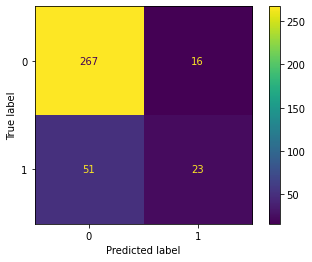

In [50]:
cm1=ConfusionMatrixDisplay(cm)
cm1.plot()

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logic_model=LogisticRegression(penalty='l2',C=3)

In [53]:
logic_model.fit(X_train,y_train)

LogisticRegression(C=3)

In [54]:
logic_model.score(X_test,y_test)

0.8851540616246498

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
random_model=RandomForestClassifier(n_estimators=500)

In [57]:
random_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [58]:
random_model.score(X_test,y_test)

0.907563025210084

In [59]:
y_pred= random_model.predict(X_test)

In [60]:
cm=(confusion_matrix(y_test, y_pred))
cm

array([[271,  12],
       [ 21,  53]])

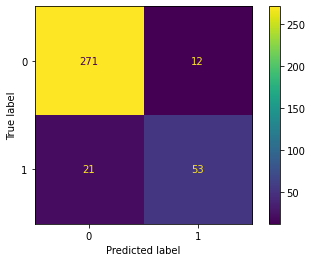

In [61]:
cm1=ConfusionMatrixDisplay(cm)
cm1.plot()

In [62]:
y_pred_train = random_model.predict(X_train)

In [63]:
X_test.isna().sum()

PassengerId    0
Pclass         0
Age            0
Fare           0
Female         0
dtype: int64

In [64]:
# Classification Report on train data set
from sklearn.metrics import classification_report
print('Classification Report on Train Data','\n\n',classification_report(y_train,y_pred_train))

Classification Report on Train Data 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1157
           1       1.00      1.00      1.00       268

    accuracy                           1.00      1425
   macro avg       1.00      1.00      1.00      1425
weighted avg       1.00      1.00      1.00      1425



In [65]:
y_pred_test = pd.DataFrame(random_model.predict(X_test),columns=['Survived'])
y_pred_test.isna().sum()


Survived    0
dtype: int64

In [66]:
submissions = pd.concat([inputs.PassengerId,y_pred_test],axis=1)

In [67]:
submissions.Survived=submissions.Survived.fillna(submissions.Survived.mean())

In [68]:
submissions.Survived.dtype

dtype('float64')

In [69]:
submissions["Survived"] = submissions["Survived"].astype(float).astype(int)

In [70]:
submissions.Survived.values

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
submissions.to_csv('submission.csv',index=False)